- ### Annualized Returns and Volatilities of Fama - French Dataset over entire history

In [200]:
import pandas as pd 
import numpy as np
import scipy.stats
rets = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv', header = 0, index_col = 0, parse_dates = True, na_values = -99.99 )
%matplotlib inline

In [201]:
rets.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [202]:
rets_mask = ['Lo 20', 'Hi 20']
rets = rets[rets_mask] / 100
rets.columns = ['SmallCap', 'LargeCap']
rets.index = pd.to_datetime(rets.index, format = '%Y%m').to_period('M')
rets.head()

,SmallCap,LargeCap
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


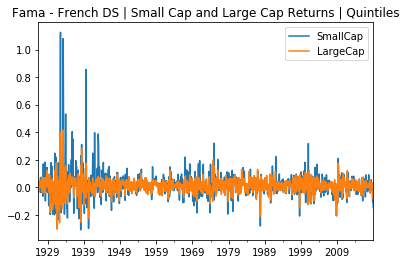

In [203]:
rets.plot(title = 'Fama - French DS | Small Cap and Large Cap Returns | Quintiles')

In [204]:
def ann_vals(r):
    n_months = r.shape[0]
    ann_rets = ((1 + r).prod()) ** (12 / n_months) - 1 
    rets_std = r.std()
    ann_vol = rets_std * np.sqrt(12)
    return pd.DataFrame({
        'Annualized Returns': ann_rets,
        'Annualized Volatility': ann_vol
    })

In [205]:
ann_vals(rets)

,Annualized Returns,Annualized Volatility
SmallCap,0.151977,0.336701
LargeCap,0.098490,0.195116


- ### Annualized Returns and Volatilities of Fama - French Dataset over the period 1999 - 2015 (both inclusive) 

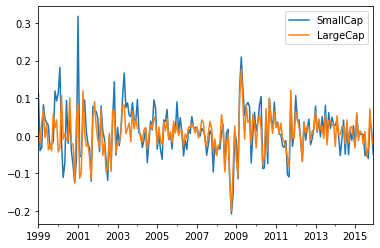

In [206]:
rets_2 = rets['1999' : '2015']
rets_2.plot()

In [207]:
ann_vals(rets_2)

,Annualized Returns,Annualized Volatility
SmallCap,0.114426,0.228894
LargeCap,0.062865,0.172713


- ### Drawdowns of Fama - French Dataset over the period 1999 - 2015 (both inclusive)

In [208]:
def drawdown(r: pd.DataFrame):
    wi = 1000 * (1 + r).cumprod()
    pp = wi.cummax()
    dd = (wi - pp) / pp
    return pd.DataFrame({
        'Wealth': wi,
        'Prev Peak': pp,
        'Drawdown': dd
    })


In [209]:
drawdown((rets_2['SmallCap'])).min()

Wealth       1034.189842
Prev Peak    1111.400000
Drawdown       -0.624809
dtype: float64

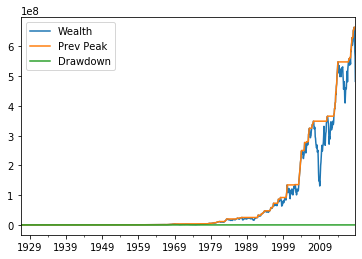

In [228]:
drawdown(rets['SmallCap']).plot()

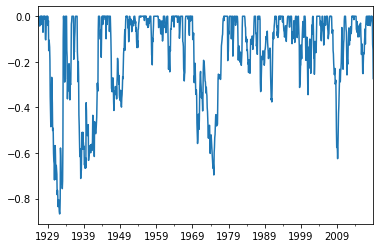

In [230]:
drawdown(rets['SmallCap'])['Drawdown'].plot()


In [210]:
drawdown((rets_2['SmallCap'])).idxmin()

Wealth       1999-03
Prev Peak    1999-01
Drawdown     2009-02
dtype: period[M]

In [211]:
drawdown((rets_2['LargeCap'])).min()

Wealth        721.706638
Prev Peak    1015.300000
Drawdown       -0.552735
dtype: float64

In [212]:
drawdown((rets_2['LargeCap'])).idxmin()

Wealth       2002-09
Prev Peak    1999-01
Drawdown     2009-02
dtype: period[M]

- ### EDHEC Hedge Fund Indices Downside Analysis

In [213]:
hfi = pd.read_csv('data\edhec-hedgefundindices.csv', header = 0, index_col = 0, parse_dates = True)
hfi = hfi / 100
hfi.index = hfi.index.to_period('M')
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [214]:
hfi_1 = hfi['2009' : '2019']
hfi_2 = hfi['2009': ]
hfi_3 = hfi['2000' : '2018']

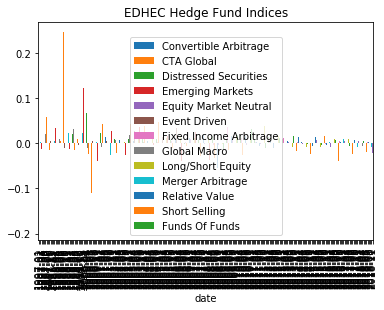

In [221]:
hfi.plot.bar(title = 'EDHEC Hedge Fund Indices')

In [215]:
def semidev(r):
    mask = r < 0
    return np.std(r[mask])

In [216]:
semidev(hfi_1).idxmax()

'Short Selling'

In [217]:
semidev(hfi_2).idxmin()

'Fixed Income Arbitrage'

In [218]:
def skewness(r):
    sd = r.std(ddof = 0)
    s = ((r - r.mean()) ** 3).mean() / sd ** 3
    return s
def kurtosis(r):
    sd = r.std(ddof = 0)
    s = ((r - r.mean()) ** 4).mean() / sd ** 4
    return s

In [219]:
skewness(hfi_2).idxmin()

'Equity Market Neutral'

In [220]:
kurtosis(hfi_3).idxmax()

'Fixed Income Arbitrage'

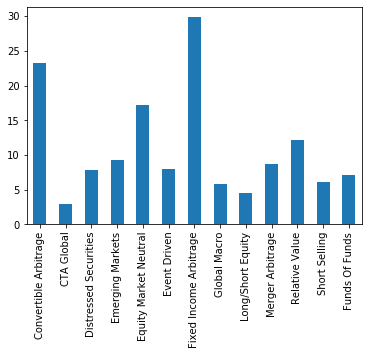

In [232]:
kurtosis(hfi).plot.bar()

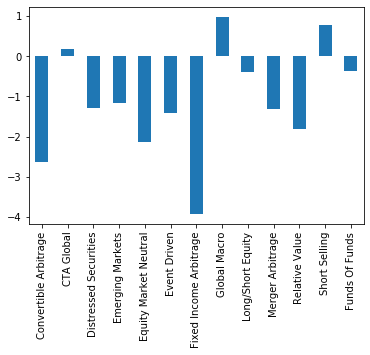

In [233]:
skewness(hfi).plot.bar()